# Analysis of sparsity and distribution of ratings on MovieLens dataset
Filippo Fantinato 2041620

In this notebook I analyzed the sparsity and distribution of ratings on MovieLens dataset.

In [ ]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

Let's download and unzip the MovieLens dataset,

In [ ]:
!wget https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2022-12-28 16:28:58--  https://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip.2’

ml-latest-small.zip 100%[===================>] 955.28K  3.06MB/s    in 0.3s    

2022-12-28 16:28:59 (3.06 MB/s) - ‘ml-latest-small.zip.2’ saved [978202/978202]

Archive:  ml-latest-small.zip
replace ml-latest-small/links.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


plot them and 

In [ ]:
movies = pd.read_csv('ml-latest-small/movies.csv')
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
ratings = pd.read_csv('ml-latest-small/ratings.csv')
ratings = ratings.drop('timestamp', axis=1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


get the total number of ratings, users and movies, since they're used in the statistics below.

In [ ]:
num_ratings = ratings.shape[0]
num_movies  = movies.shape[0]
num_users   = ratings.userId.nunique()

print("Number of ratings:", num_ratings)
print("Number of movies:", num_movies)
print("Number of users:", num_users)

Number of ratings: 100836
Number of movies: 9742
Number of users: 610


The density of ratings can be obtained in the following way:
\begin{align}
  density = \frac{\#ratings}{\#movies \cdot \#users}
\end{align}

while sparsity
\begin{align}
sparsity = 1-density
\end{align}

In [ ]:
density = num_ratings / (num_movies * num_users)
sparsity = 1 - density

print('Density:', round(density * 100, 2), '%')
print('Sparsity:', round(sparsity * 100, 2), '%')

Density: 1.7 %
Sparsity: 98.3 %


Here I get the distribution of ratings for each user, that is the number of ratings for each user, and I plot it.

In [ ]:
distribution = ratings[['userId', 'movieId']].groupby(['userId']).count()
distribution = distribution.rename(columns={"movieId": "#ratings"})
distribution.head()

,#ratings
userId,
1,232
2,29
3,39
4,216
5,44


The plot shows that the distribution is a long tail one, as expected, and the long tail phenomenon, i.e. there are few movies which are very popular, the ones located on the heavy tail, and many movies which aren't popular, the ones located at the beginning of the tail.

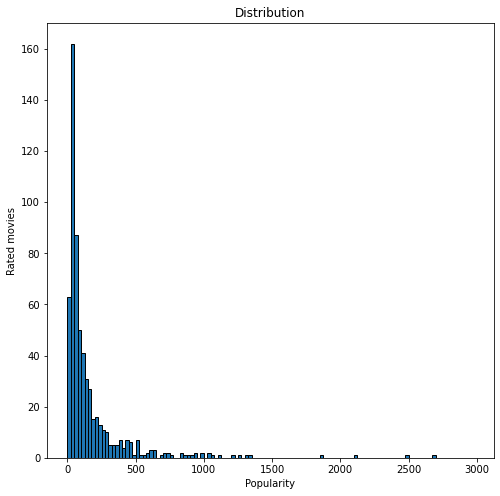

In [ ]:
plt.figure(figsize = (8, 8)) 
plt.hist(distribution['#ratings'], bins = range(0, 3000, 25), edgecolor = 'black')
plt.title('Distribution')
plt.xlabel('Popularity')
plt.ylabel('Rated movies')
plt.show()